## CA2

sba23031

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import compute_class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping


In [27]:
df = pd.read_csv("glass_data.csv")

In [28]:
df.shape

(214, 11)

Our dataset has 214 rows and 11 columns.

In [29]:
df.head(20)

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


## Exploratory Data Analysis

In [30]:
df.describe()

,id,ri,na,mg,al,si,k,ca,ba,fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


After reading the data and checking it loaded successfully the first thing to do is to call df.describe()

This function from the pandas library will give a comprehensive summary of the basic statistics of each column.

The values for ID don't really matter as it is just an identification column.

The "type" column also is pretty understandable as it is the classification of 1-7 with 4 missing.

The rest of the columns give more valuable information. The first thing that sticks out is that the columns "ba" and "fe" have a very low mean and a lot of 0.0 values. This could effect the data preparation and how the model is built. Those fields might could potentially not contribute much to the classification.

I don't have domain knowledge so maybe this is still valuable information.

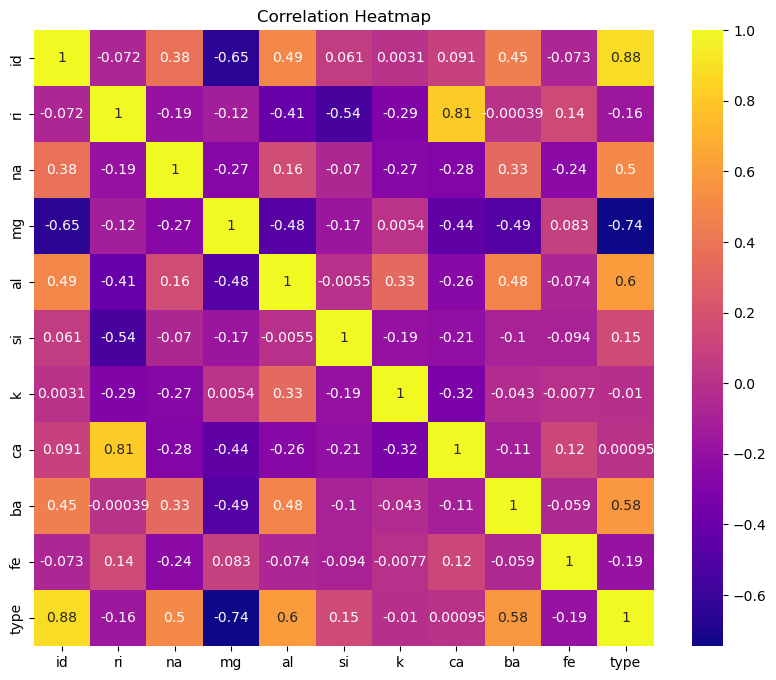

In [31]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title("Correlation Heatmap")
plt.show()


A correlation matrix will give an idea of how much one feature can effect the other.

From this there doesn't seem to be any great correlation to the glass type.

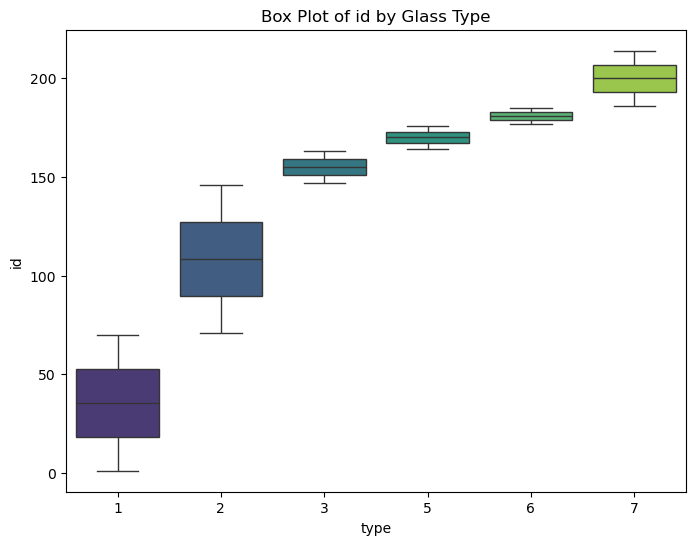

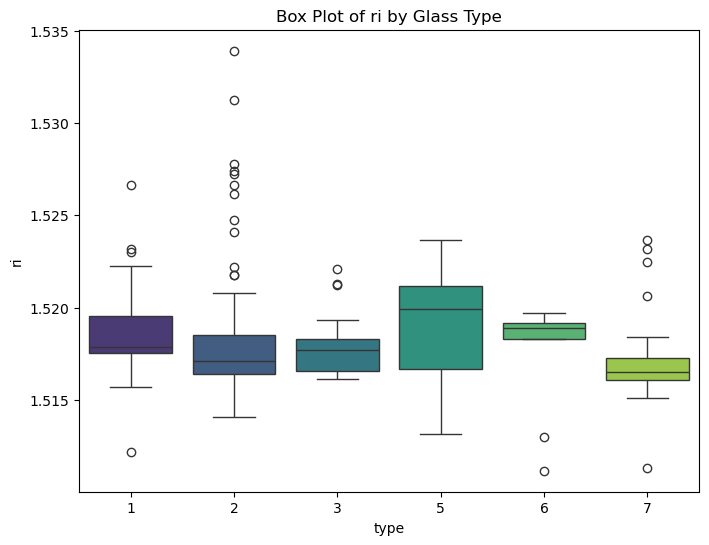

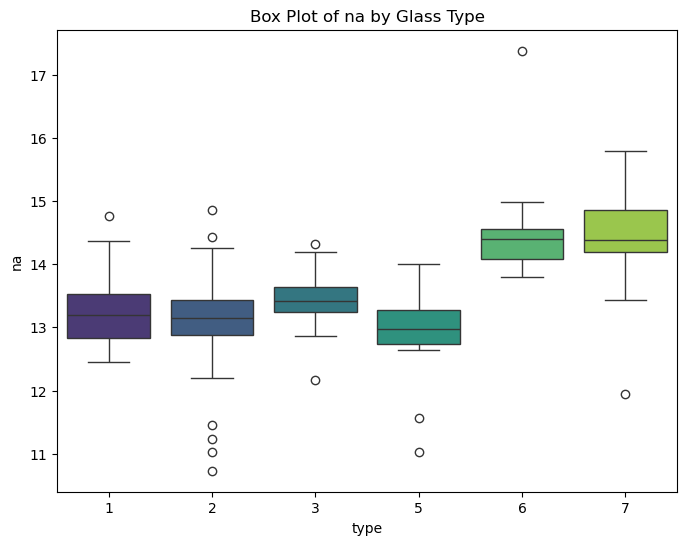

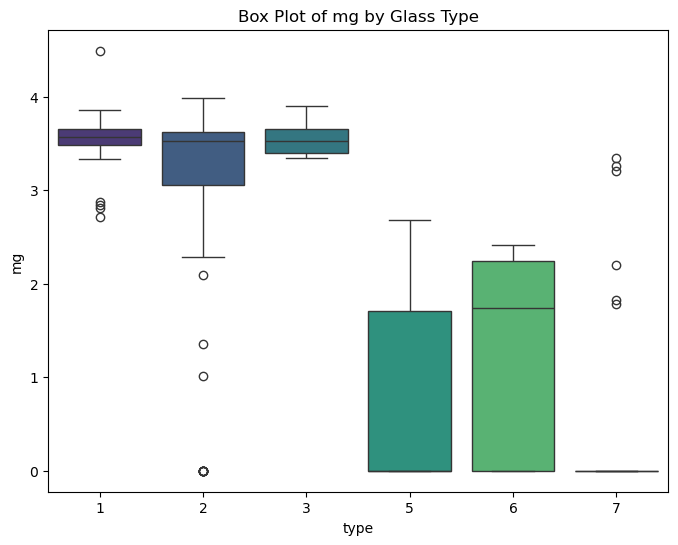

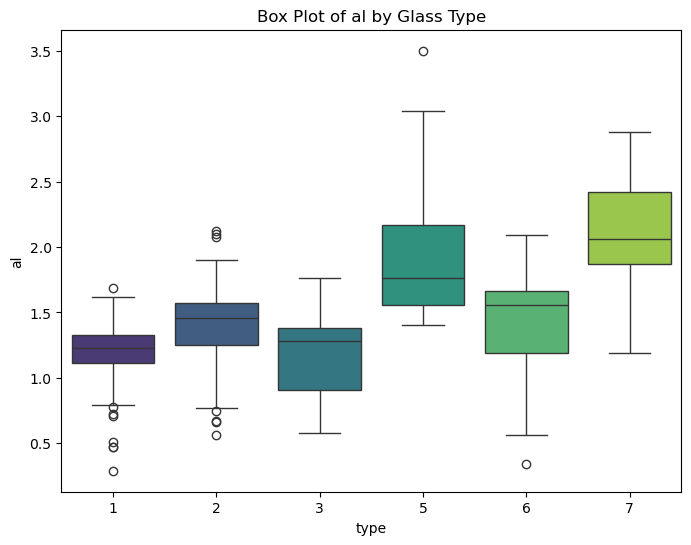

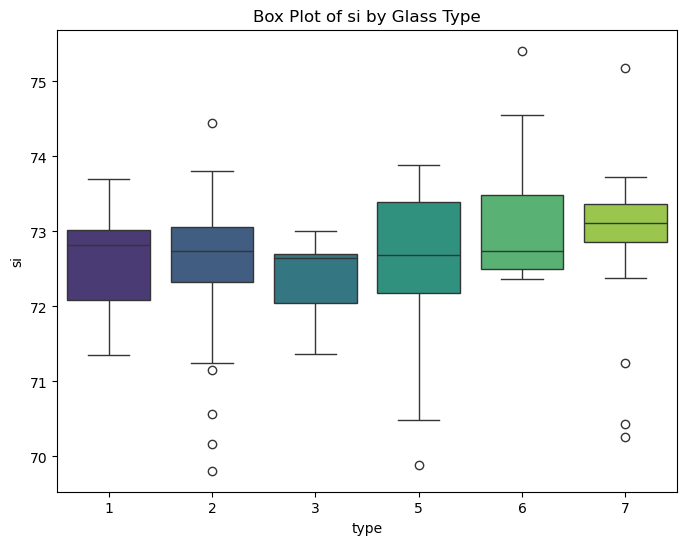

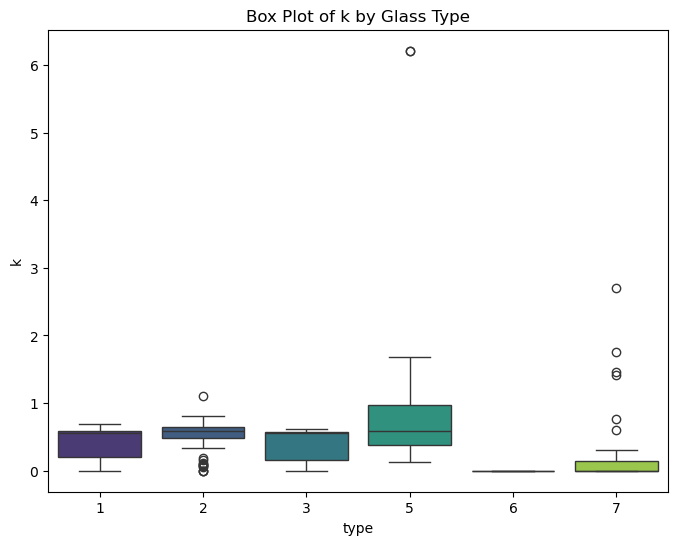

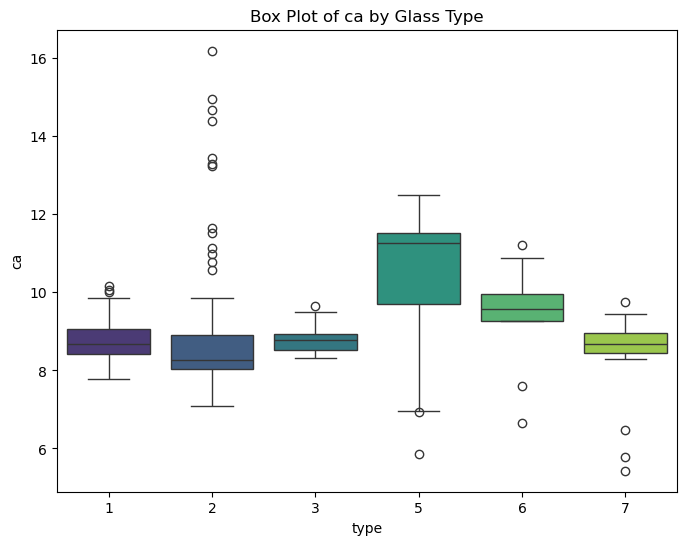

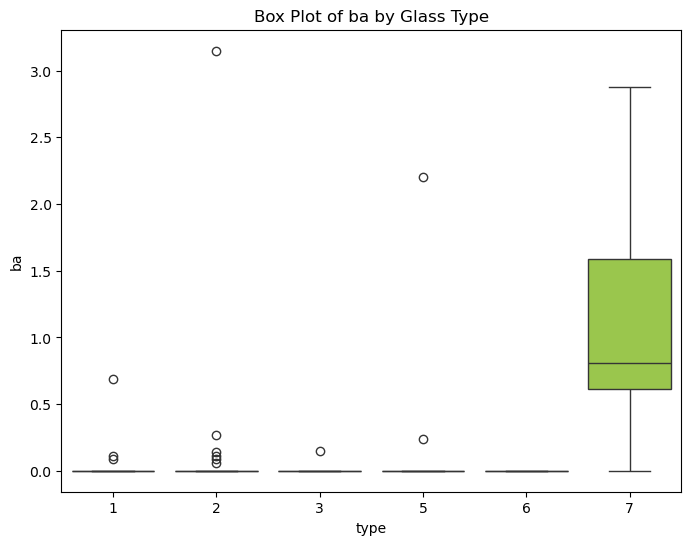

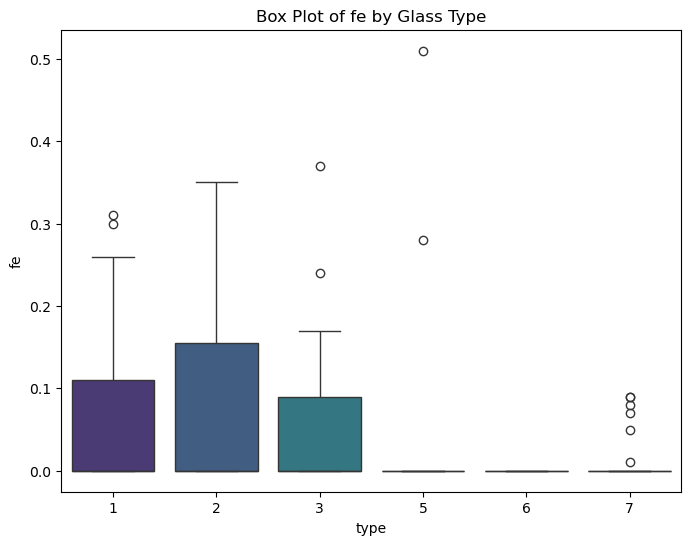

In [32]:
selected_columns = ['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe']

for feature in df.columns[:-1]:  # Exclude the target variable
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='type', y=feature, data=df, palette='viridis')
    plt.title(f"Box Plot of {feature} by Glass Type")
    plt.show()

The box plots above show the distribution of each checmical with regards to the glass type. 

Again it shows some useful information in regards to "ba" and "fa". Iron seems to be very much in class types 1,2, and 3. While barium is mainly in type 7 but it has some outliers in regards 1 and 2.

<Axes: xlabel='type', ylabel='count'>

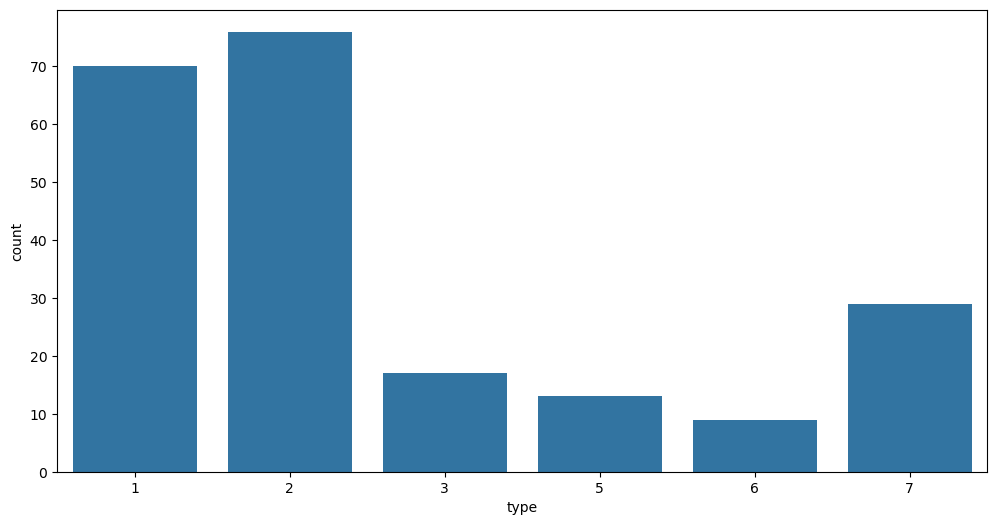

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x='type', data=df)

Next thing is to get an idea of the distribution of the target variable. The absence of glass type 4 made me suspicous there there could be unbalanced data. 

From the bar chart above we can see that the target variable leads more towards types 1 and 2. This imbalance needs to be sorted when we split the data for training the model.

## Data Cleaning

After exploring the data we now need to clean it before applying any model. 

The main thing is check if there are any null or missing values.

In [34]:
df.isna().sum()

id      0
ri      0
na      0
mg      0
al      0
si      0
k       0
ca      0
ba      0
fe      0
type    0
dtype: int64

Straight away this dataset has no null values. This would not usually be the case but at this is a small dataset containing mostly numerics it is not that ouf of the ordinary.

But since this is numerical we can plot how much of each variable has a value of 0.00. Like mentioned above we don't have domain knowledge of this area so the zero values can't be taken as invalid. They need to be kept into consideration for now.

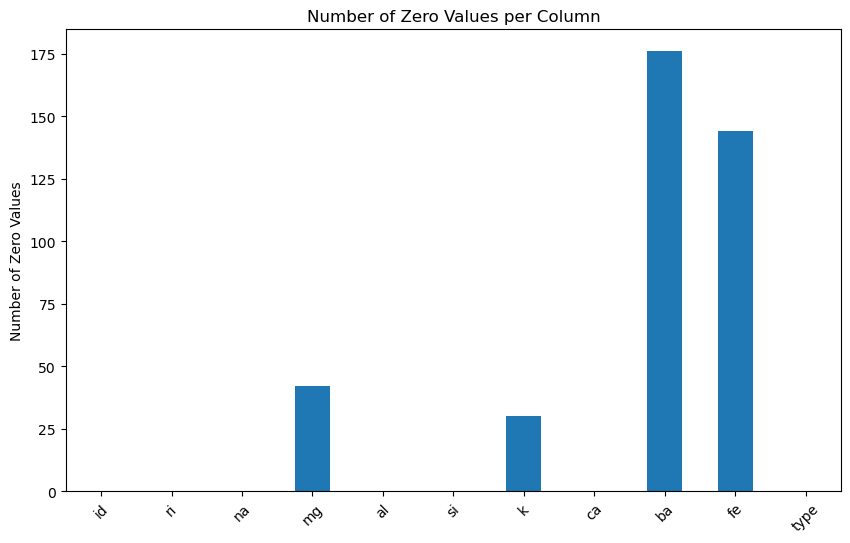

In [35]:
zero_counts = (df == 0).sum()

plt.figure(figsize=(10, 6))
zero_counts.plot(kind='bar')
plt.title('Number of Zero Values per Column')
plt.ylabel('Number of Zero Values')
plt.xticks(rotation=45)
plt.show()

In [36]:
df.nunique()

id      214
ri      178
na      142
mg       94
al      118
si      133
k        65
ca      143
ba       34
fe       32
type      6
dtype: int64

The ID column is just a unique identifier for each row and is not necessary for this project. The valus are all too unique and don't provide anything for the prediction.

In [37]:
df.drop("id", inplace=True, axis=1)

In [38]:
df.shape

(214, 10)

In [39]:
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Model

In [40]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['type'])
y = df['type']

In [41]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.175, random_state=42)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_test_scaled, y_test))


Epoch 1/100
38/38 [==============================] - 1s 4ms/step - loss: 1.6205 - accuracy: 0.4441 - val_loss: 1.3466 - val_accuracy: 0.7250
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 1.2247 - accuracy: 0.7074 - val_loss: 1.0096 - val_accuracy: 0.8125
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.9231 - accuracy: 0.7926 - val_loss: 0.7985 - val_accuracy: 0.8125
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.7424 - accuracy: 0.8191 - val_loss: 0.6901 - val_accuracy: 0.8000
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.8218 - val_loss: 0.6317 - val_accuracy: 0.8125
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.8378 - val_loss: 0.6101 - val_accuracy: 0.8000
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.8351 - val_loss: 0.5726 - val_accuracy: 0.8125
Epoch 8/100
3

In [50]:
scores = model.evaluate(X_train_scaled, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test_scaled, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

12/12 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.9787
Training Accuracy: 97.87%

3/3 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.9000
Testing Accuracy: 90.00%



In [46]:
# Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy}")

3/3 [==============================] - 0s 2ms/step
Accuracy on Test Set: 0.8875


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.85      0.65      0.73        17
           2       0.82      1.00      0.90         9
           3       0.93      1.00      0.96        13
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        16

    accuracy                           0.89        80
   macro avg       0.88      0.90      0.89        80
weighted avg       0.89      0.89      0.88        80



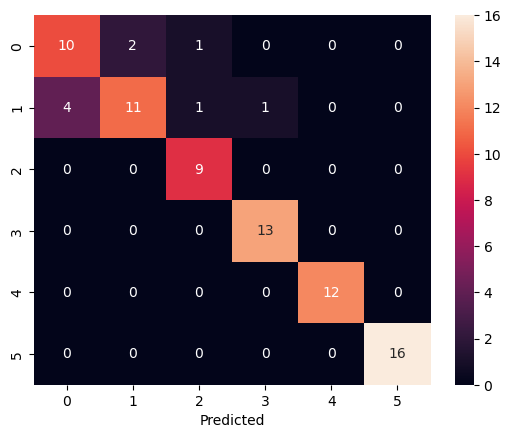

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.show()